# Investigating TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I will be investigating the [TMDb movie data](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&source=editors&ust=1653145802446080&usg=AOvVaw1wt1jd4_3K2KQf2sAnqPDP), a dataset from Udacity Data Analyst Nano Degree. The original data source comes from [Kaggle](https://www.google.com/url?q=https://www.kaggle.com/tmdb/tmdb-movie-metadata&sa=D&source=editors&ust=1653145802446782&usg=AOvVaw2F4IDb3U97uYwySqF8FRYN). This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

The data analysis process is organized into five steps: Question, Wrangle, Explore, Draw Conclusions, and Communicate.
The goal of this project is to walk through each of these steps to investigate the TMBd movie dataset using Python libraries such as Pandas, NumPy, and Matplotlib.

**Throughout this project, we will answer the following questions:**
+ Which genre has the highest release of movies?
+ Which cast was most filmed?
+ Which director produces most movies?
+ Which year has the highest release of movies?
+ Which movies have the highest and lowest revenue?
+ Which movies have the highest and lowest budget?
+ Which movies have the highest And lowest runtime?
+ What is the relationship between the revenue and budget?
+ Which year had the most popular movies?

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# loading the dataset
movies = pd.read_csv(r'C:\Users\Emmanuel Ugwu\Downloads\tmdb-movies.csv')

# view the shape and the first few rows of movies
print(movies.shape)
movies.head()

(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**This dataset contains 10866 rows and 21 columns.**

In [3]:
# checking the dataset information
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From the above info, we can make the following points:
+ Since the `id` and `imdb_id` columns are both id columns, we can drop the `imdb_id` column as it is not relevant to our analysis.
+ The columns that are relevant for answering our questions include: `popularity`, `budget`, `revenue`, `original_title`, `cast`, `director`, `runtime`, `genres`, `release_date`, `vote_count`, `release_year`. 
+ The columns that are not relevant for our analysis include: `homepage`, `tagline`, `keywords`, `overview`, `production_companies`, `vote_average`, `budget_adj`, `revenue_adj`.
+ We can drop these columns that are not relevant to our dataset.
+ The `release_date` column has to be converted to pandas DateTime object for proper analysis.

Let's explore futher to see if there are duplicate rows and null values in our relevant columns.

In [4]:
# number of duplicate rows in movies
movies.duplicated().sum()

1

In [5]:
# columns with missing values
movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
# checking the summary statistics of movies
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From our summary statistics, we can say that the minimum values for the budget and revenue columns are 0 which means that there were no records for some columns. We will have to drop these columns when working with the budget and revenue columns.

### Data Cleaning

### #1 Drop irrelevant columns
Let's drop the following columns that aren't relevant to our questions using the pandas' drop function. Columns to drop: `'imbd_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'vote_average', 'budget_adj', 'revenue_adj'`.

In [7]:
# drop columns
movies.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'vote_average', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

# confirm changes
movies.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,2015


### #2 Drop Nulls
Next, we drop any rows that contain missing values.

In [8]:
# drop rows with any null values
movies.dropna(inplace=True)

# confirm changes
movies.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
release_year      0
dtype: int64

### #3 Dedupe Data
Next, we drop any duplicate rows

In [9]:
# drop duplicates
movies.drop_duplicates(inplace=True)

#confirm changes
movies.duplicated().sum()

0

### #4 Fixing Data Types
Next, we change the format of `release_date` column into DateTime format.

In [10]:
# convert release_date to datetime
movies['release_date'] = pd.to_datetime(movies['release_date'])

# confirm changes
movies['release_date'].dtypes

dtype('<M8[ns]')

In [11]:
# check all columns are of the needed types
movies.dtypes

id                         int64
popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
release_year               int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

### Which genre has the highest release of movies?

In [12]:
# concate all rows of the genres column
genre = movies.genres.str.cat(sep = '|')

In [13]:
# Split the genres and make a count for each genre
genre = pd.Series(genre.split('|'))
total_genre = genre.value_counts(ascending = False)
total_genre

Drama              4746
Comedy             3775
Thriller           2902
Action             2376
Romance            1708
Horror             1636
Adventure          1465
Crime              1353
Science Fiction    1221
Family             1214
Fantasy             908
Mystery             808
Animation           664
Documentary         470
Music               399
History             330
War                 268
Foreign             184
Western             164
TV Movie            162
dtype: int64

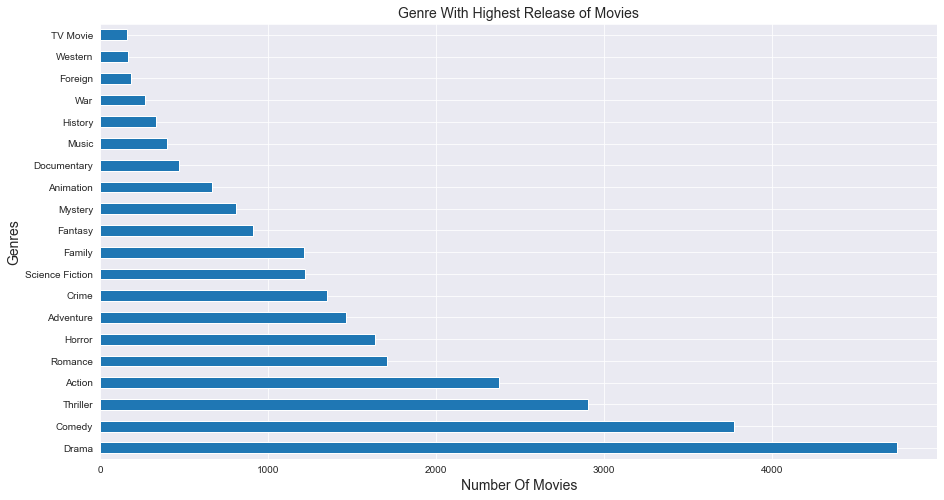

In [14]:
# make a bar plot of the total_genre
sns.set_style('darkgrid')
total_genre.plot(kind = 'barh', figsize=(15,8))

# setup the axis and title label
plt.title("Genre With Highest Release of Movies", fontsize = 14)
plt.xlabel("Number Of Movies", fontsize = 14)
plt.ylabel("Genres", fontsize = 14)
plt.show()

**From the above plot, the genre with the highest release of movies is drama, having a total number of 4746 movies.**

### Which cast was most filmed?

In [15]:
# concate all rows of the cast column
cast = movies.cast.str.cat(sep = '|')

In [16]:
# Split the cast and make a count for each cast
cast = pd.Series(cast.split('|'))
total_cast = cast.value_counts(ascending = False)
total_cast

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
                     ..
Tess Liu              1
Paolo Stoppa          1
Billy Warlock         1
Melissa Collier       1
Barbara Eda-Young     1
Length: 18930, dtype: int64

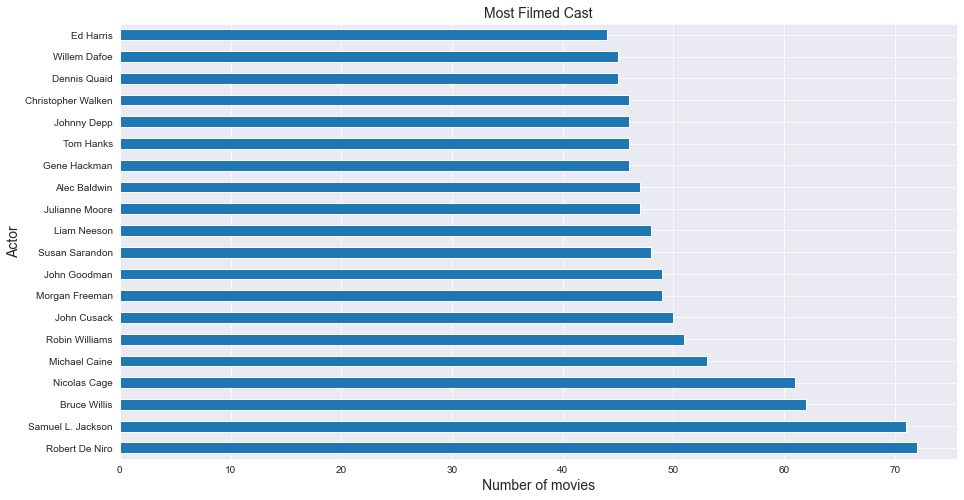

In [17]:
# make a bar plot of the total_cast
sns.set_style('darkgrid')
total_cast.iloc[:20].plot(kind = 'barh', figsize=(15,8))

# setup the axis and title label
plt.title("Most Filmed Cast", fontsize = 14)
plt.xlabel("Number of movies", fontsize = 14)
plt.ylabel("Actor", fontsize = 14)
plt.show()

**From the above plot, the most filmed cast is Robert De Niro with the total number of movies being 72.**

### Which director produces most movies?

In [18]:
# make a count for each director
total_director = movies.director.value_counts(ascending = False)
total_director

Woody Allen                 45
Clint Eastwood              34
Steven Spielberg            29
Martin Scorsese             28
Ridley Scott                23
                            ..
Alexandre O. Philippe        1
David Zellner                1
Walter Hill|Jack Sholder     1
Joel Allen Schroeder         1
Karen Disher|Guy Moore       1
Name: director, Length: 5018, dtype: int64

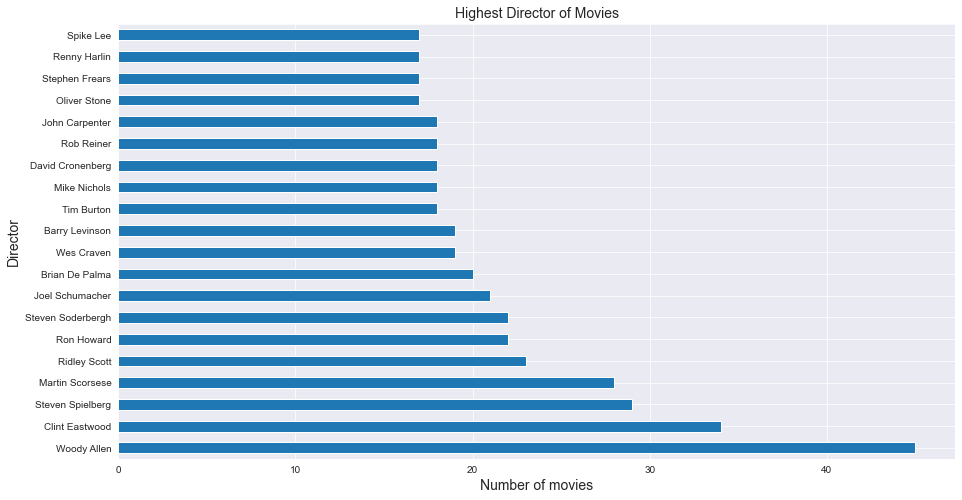

In [19]:
# make a bar plot of the total_director
sns.set_style('darkgrid')
total_director.iloc[:20].plot(kind = 'barh', figsize=(15,8))

# setup the axis and title label
plt.title("Highest Director of Movies", fontsize = 14)
plt.xlabel("Number of movies", fontsize = 14)
plt.ylabel("Director", fontsize = 14)
plt.show()

**From the above plot, the director producing most movies is Woody Allen, with a total number of 45 movies.**

### Which year has the highest release of movies?

In [20]:
# make a count for each release_year column
total_year = movies.release_year.value_counts(ascending = False)
total_year

2014    682
2013    649
2015    617
2012    574
2011    532
2009    525
2008    486
2010    475
2007    432
2006    404
2005    361
2004    307
2003    281
2002    264
2001    241
2000    224
1999    224
1998    210
1996    203
1997    191
1994    184
1993    177
1995    174
1988    142
1989    135
1991    133
1992    132
1990    132
1987    124
1986    120
1985    108
1984    104
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     56
1971     55
1973     55
1976     47
1974     46
1966     46
1975     44
1964     42
1970     40
1972     40
1967     38
1968     38
1965     35
1963     34
1962     32
1960     32
1961     31
1969     30
Name: release_year, dtype: int64

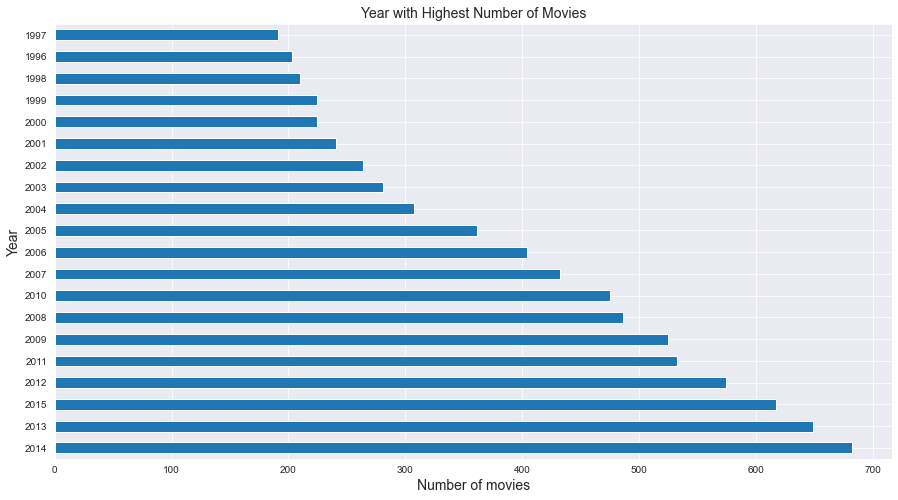

In [21]:
# make a bar plot of the total_year
sns.set_style('darkgrid')
total_year.iloc[:20].plot(kind = 'barh', figsize=(15,8))

# setup the axis and title label
plt.title("Year with Highest Number of Movies", fontsize = 14)
plt.xlabel("Number of movies", fontsize = 14)
plt.ylabel("Year", fontsize = 14)
plt.show()

**From the above plot, the year with the highest number of movies is 2014, with a total number of 682 movies.**

### Which movies have the highest and lowest revenue?

In [22]:
# create a function to find the min and the max value of any given column
def find_min_max(col_name):
    # find the index of the lowest given col_name
    min_index = movies[col_name].idxmin()
    # find the index of the highest given col_name
    max_index = movies[col_name].idxmax()
    # select the lowest value from given col_name
    lowest = pd.DataFrame(movies.loc[min_index, :])
    # select the highest value from given col_name
    highest = pd.DataFrame(movies.loc[max_index, :])
    # print the results
    print('The movie with the highest ' +col_name+ ' is ', movies['original_title'][max_index])
    print('The movie with the lowest ' +col_name+ ' is ', movies['original_title'][min_index])
    return pd.concat([highest,lowest], axis = 1)

In [23]:
# find the movie with highest and lowest revenue using our predefined function find_min_max
find_min_max('revenue')

The movie with the highest revenue is  Avatar
The movie with the lowest revenue is  Wild Card


,1386,48
id,19995,265208
popularity,9.43277,2.93234
budget,237000000,30000000
revenue,2781505847,0
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
director,James Cameron,Simon West
runtime,162,92
genres,Action|Adventure|Fantasy|Science Fiction,Thriller|Crime|Drama
release_date,2009-12-10 00:00:00,2015-01-14 00:00:00


### Which movies have the highest and lowest budget?

In [24]:
# find the movie with highest and lowest budget using our predefined function find_min_max
find_min_max('budget')

The movie with the highest budget is  The Warrior's Way
The movie with the lowest budget is  Mr. Holmes


,2244,30
id,46528,280996
popularity,0.25054,3.92733
budget,425000000,0
revenue,11087569,29355203
original_title,The Warrior's Way,Mr. Holmes
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Ian McKellen|Milo Parker|Laura Linney|Hattie M...
director,Sngmoo Lee,Bill Condon
runtime,100,103
genres,Adventure|Fantasy|Action|Western|Thriller,Mystery|Drama
release_date,2010-12-02 00:00:00,2015-06-19 00:00:00


### Which movies have the highest And lowest runtime?

In [25]:
# find the movie with highest and lowest runtime using our predefined function find_min_max
find_min_max('runtime')

The movie with the highest runtime is  The Story of Film: An Odyssey
The movie with the lowest runtime is  Mythica: The Necromancer


,3894,92
id,125336,370687
popularity,0.006925,1.87604
budget,0,0
revenue,0,0
original_title,The Story of Film: An Odyssey,Mythica: The Necromancer
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...
director,Mark Cousins,A. Todd Smith
runtime,900,0
genres,Documentary,Fantasy|Action|Adventure
release_date,2011-09-03 00:00:00,2015-12-19 00:00:00


### What is the relationship between the revenue and budget?

The correlation between Revenue And Budget is  0.6884031904522725


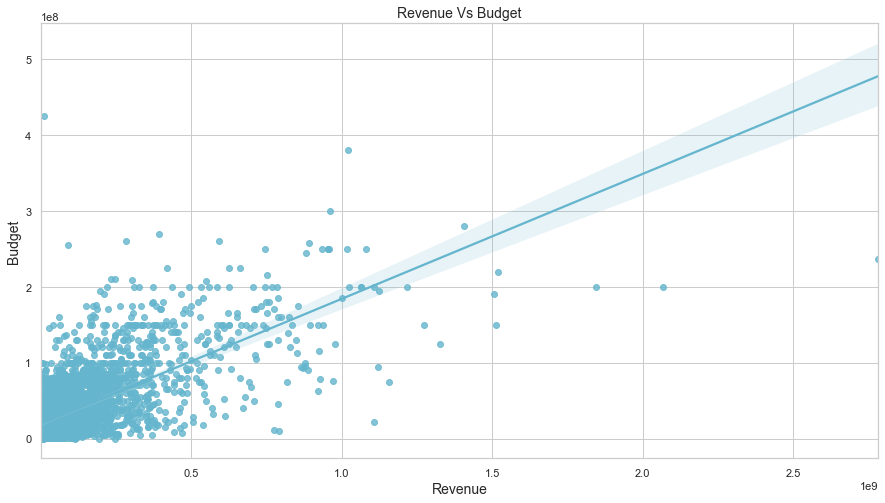

In [27]:
# make a scatter plot using 'regplot' between ''revenue' and 'budget'.
ax = sns.regplot(x=movies['revenue'], y=movies['budget'],color='c')

# set the axis and title label
ax.set_title("Revenue Vs Budget", fontsize=14)
ax.set_xlabel("Revenue", fontsize=14)
ax.set_ylabel("Budget", fontsize=14)

# set the figure size and style
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("whitegrid")

# change zero into NAN in budget and revenue column for correct analysis
movies['budget'] = movies['budget'].replace(0,np.NAN)
movies['revenue'] = movies['revenue'].replace(0,np.NAN)

# find the correlation using 'corr()' function
data_corr = movies.corr()
print("The correlation between Revenue And Budget is ",data_corr.loc['revenue','budget'])

**From the above plot, we see that revenue and budget have a positive correlation(0.68). This means that movies with higher budgets result in better revenues.**

### Which year had the most popular movies?

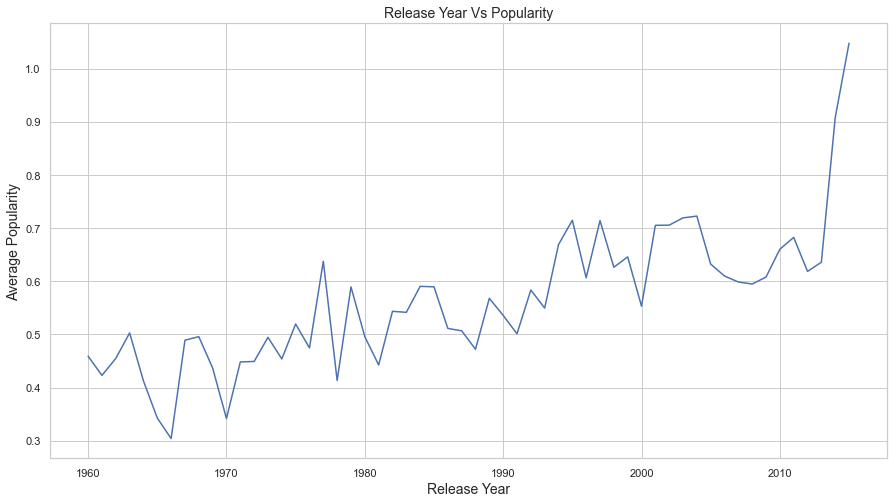

In [28]:
# group the release_year and find the average popularity
popular_movies = movies.groupby('release_year')['popularity'].mean()

# make a plot of the release_year and the Average Popularity
popular_movies.plot()

# set the figure size and style
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

# setup the axis and title label
plt.title("Release Year Vs Popularity", fontsize = 14)
plt.xlabel("Release Year", fontsize = 14)
plt.ylabel("Average Popularity", fontsize = 14)
plt.show()

**From the above plot, the least popular movies was between 1966 - 1970 and the most popular movies was from 2012 - 2015**

<a id='conclusions'></a>
## Conclusions

The goal of this analysis was to walk through each of the steps in the data analysis process to investigate the TMBd movie dataset using Python libraries such as Pandas, NumPy, and Matplotlib. After answering some questions based on the dataset, we can make the following conclusion.

> **Results:** Our data suggest that:
>1. The most popular genres are Drama, Comedy and Thriller.
>2. The most filmed actors were Robert De Niro, Samuel L. Jackson and Bruce Wills.
>3. The most filmed directors were Woody Allen, Clint Eastwood and Steven Spielberg.
>4. The year with the highest number of movies is 2014, followed by 2013 and 2015.
>5. The movie with the highest revenue is Avatar and the movie with the lowest revenue is Shattered Glass.
>6. The movie with the highest budget is The Warrior's Way and the movie with the lowest budget is Lost & Found.
>7. The movie with the longest runtime is Carlos.
>8. Movies with higher budgets result in better revenues.
>9. The most popular movie was produced in the year 2015.

> **Limitations:** There are a couple of limitations with our data:
>1. Most of the values in the budget and revenue columns are zero which means they are null values and they affect the summary of our results for those columns.
>2. Having to split the data columns seperated by '|' into lists for easy parsing during the exploration phase increases the time taken in calculating the results.
>3. Most of the movies has multiple genres, and we have included all the genres during our calculation.